In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot
import matplotlib.dates as mdates

In [2]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
vs = pd.read_csv('dfw_vs.csv')

In [4]:
vs['VOLUME'] = vs['LENGTH'] * vs['WIDTH']

In [4]:
vs.head()

,Unnamed: 0,FACILITYNAME,CREATIONTIME,MACHINEID,LENGTH,WIDTH,HEIGHT,WEIGHT,BARCODE,MERCHANT,MERCHANT_ORG_KEY,VOLUME
0,0,DFW4,2020-08-26 12:31:42.273,7,266.0,78.0,260.0,244.0,420748659274892700465584830458,Victoria Secret,914,20748.0
1,1,DFW4,2020-08-26 12:32:15.527,7,339.0,117.0,295.0,431.0,420786609274892700465584811532,Victoria Secret,914,39663.0
2,2,DFW4,2020-08-26 12:32:14.100,7,224.0,82.0,177.0,106.0,420770189274892700465584714598,Victoria Secret,914,18368.0
3,3,DFW4,2020-08-26 12:33:40.293,7,344.0,100.0,211.0,289.0,420750289274892700465584514662,Victoria Secret,914,34400.0
4,4,DFW4,2020-08-26 12:34:24.913,7,251.0,65.0,198.0,182.0,420774799274892700465584674083,Victoria Secret,914,16315.0


In [5]:
vs = vs.drop(['Unnamed: 0'], axis = 1)

In [6]:
vs = vs[vs['LENGTH'] != 0]
vs = vs[vs['WIDTH'] != 0]
vs = vs[vs['HEIGHT'] != 0]
vs = vs[vs['WEIGHT'] != 0]

In [7]:
vs['CREATIONTIME'] = pd.to_datetime(vs['CREATIONTIME'])

In [8]:
vs7 = vs[vs['MACHINEID'] == 7]

In [9]:
vs8 = vs[vs['MACHINEID'] ==8]

# Machine 7, 3 Hours

In [10]:
vs7_med = vs7.resample('3H', on='CREATIONTIME').agg({'WEIGHT':'median', 'VOLUME':'median'})
vs7_med = vs7_med.reset_index()

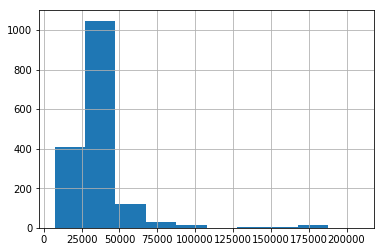

In [13]:
vs7_med['VOLUME'].hist()

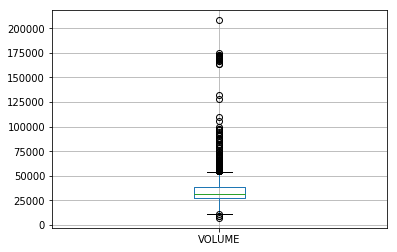

In [15]:
vs7_med.boxplot('VOLUME')

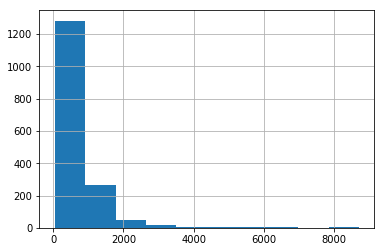

In [16]:
vs7_med['WEIGHT'].hist()

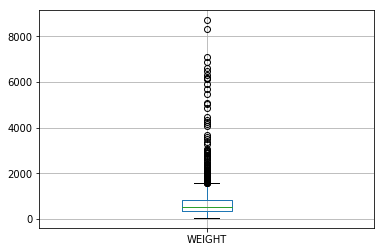

In [17]:
vs7_med.boxplot('WEIGHT')

### Volume - Machine 7, 3 Hours

In [29]:
volume = pd.DataFrame()
volume[['CREATIONTIME', 'VOLUME']] = vs7_med[['CREATIONTIME', 'VOLUME']]
volume.head()

,CREATIONTIME,VOLUME
0,2020-08-18 00:00:00,27634.0
1,2020-08-18 03:00:00,26520.0
2,2020-08-18 06:00:00,NaN
3,2020-08-18 09:00:00,23653.5
4,2020-08-18 12:00:00,28864.0


In [30]:
volume.columns = ['ds', 'y']
model = Prophet()
model.fit(volume)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [35]:
Final = pd.DataFrame()

In [32]:
future = list()
for i in range(1, 13):
    date = '2020-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [33]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2020-01-01  11833.135241 -12959.729163  33387.825769
1 2020-02-01  14671.550807  -8821.752285  39630.955572
2 2020-03-01  18055.239965  -7214.595676  41096.353661
3 2020-04-01  16962.771350  -7230.398711  40156.996805
4 2020-05-01  21039.553843  -1615.813213  43797.334691


In [36]:
Final = Final.append(forecast)

In [37]:
future1 = list()
for i in range(1, 13):
    date = '2021-%02d' % i
    future1.append([date])
future1 = pd.DataFrame(future1)
future1.columns = ['ds']
future1['ds'] = pd.to_datetime(future1['ds'])

In [38]:
forecast1 = model.predict(future1)
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2021-01-01  39542.673338  14841.664871  61504.809126
1 2021-02-01  44862.061116  21334.976808  66515.064906
2 2021-03-01  47552.756729  21938.444068  70635.852922
3 2021-04-01  44250.070388  20818.808936  67245.568223
4 2021-05-01  42754.247407  19165.717693  66997.494481


In [41]:
Final = Final.append(forecast1)

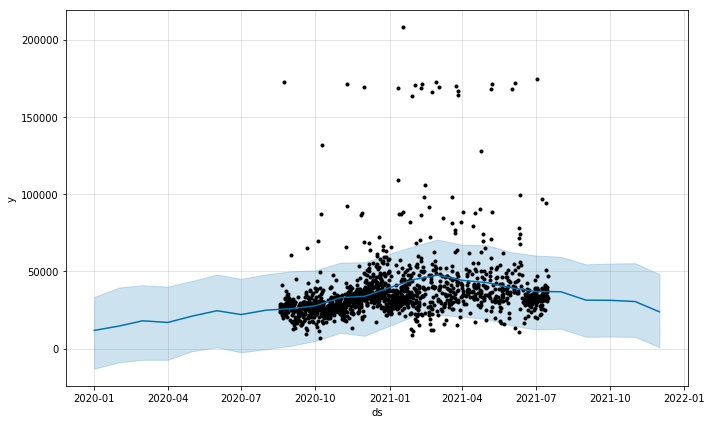

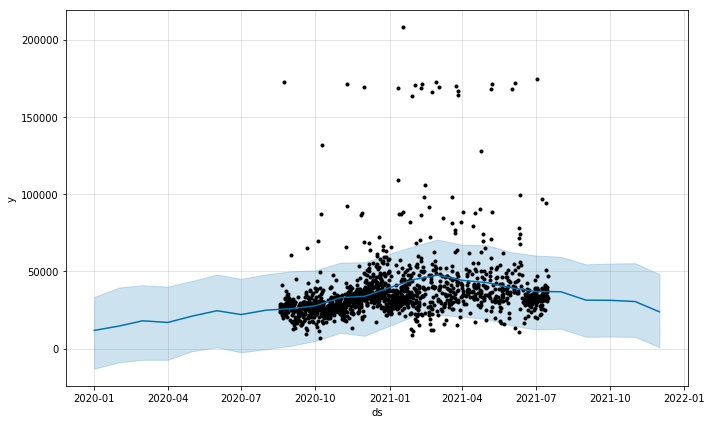

In [42]:
model.plot(Final)

### Weight - Machine 7, 3 Hours

In [53]:
weight = pd.DataFrame()
weight[['CREATIONTIME', 'WEIGHT']] = vs7_med[['CREATIONTIME', 'WEIGHT']]
weight.head()

,CREATIONTIME,WEIGHT
0,2020-08-18 00:00:00,416.0
1,2020-08-18 03:00:00,412.0
2,2020-08-18 06:00:00,NaN
3,2020-08-18 09:00:00,316.0
4,2020-08-18 12:00:00,435.0


In [54]:
weight.columns = ['ds', 'y']
model1 = Prophet()
model1.fit(weight)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [55]:
Final1 = pd.DataFrame()

In [56]:
future2 = list()
for i in range(1, 13):
    date = '2020-%02d' % i
    future2.append([date])
future2 = pd.DataFrame(future2)
future2.columns = ['ds']
future2['ds'] = pd.to_datetime(future2['ds'])

In [57]:
forecast2 = model1.predict(future2)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat   yhat_lower   yhat_upper
0 2020-01-01 -264.276100 -1179.486572   614.696935
1 2020-02-01 -152.329361 -1054.342617   733.945214
2 2020-03-01  -28.017227  -852.894760   865.958672
3 2020-04-01  -54.353429  -865.528316   856.107560
4 2020-05-01  106.002027  -801.838627  1058.340044


In [58]:
Final1 = Final1.append(forecast2)

In [59]:
future3 = list()
for i in range(1, 13):
    date = '2021-%02d' % i
    future3.append([date])
future3 = pd.DataFrame(future3)
future3.columns = ['ds']
future3['ds'] = pd.to_datetime(future3['ds'])

In [60]:
forecast3 = model1.predict(future3)
print(forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat  yhat_lower   yhat_upper
0 2021-01-01   739.925844 -143.972705  1595.860309
1 2021-02-01  1011.783675   68.645759  1942.280385
2 2021-03-01  1262.097240  351.786942  2220.629151
3 2021-04-01  1388.187734  505.601212  2303.421353
4 2021-05-01  1243.448679  259.296307  2137.041796


In [61]:
Final1 = Final1.append(forecast3)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:2224: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:252: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


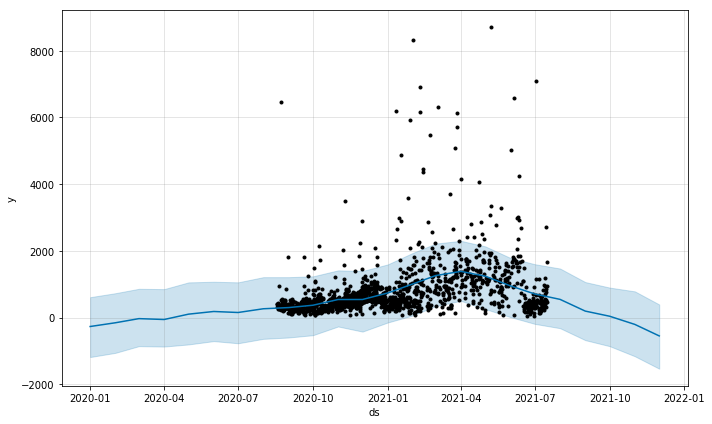

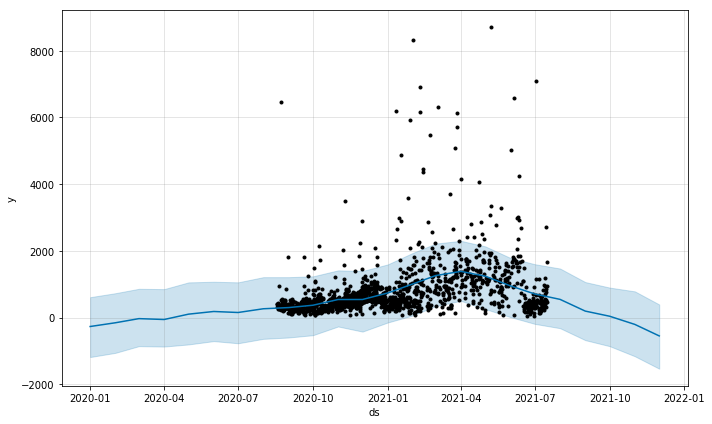

In [62]:
model1.plot(Final1)

### Analysis on Machine 7

In [126]:
vs7_med.sort_values(by = ['VOLUME'], ascending = False).head(10)

,CREATIONTIME,WEIGHT,VOLUME,DENSITY
1220,2021-01-17 12:00:00,4879.0,208187.0,0.023436
2547,2021-07-02 09:00:00,7094.0,174682.0,0.040611
37,2020-08-22 15:00:00,6470.0,172692.0,0.037466
1549,2021-02-27 15:00:00,2253.0,172590.0,0.013054
2329,2021-06-05 03:00:00,6597.0,171976.0,0.038360
2100,2021-05-07 12:00:00,8712.0,171600.0,0.050769
1404,2021-02-09 12:00:00,6899.0,171185.0,0.040301
669,2020-11-09 15:00:00,3494.0,171127.0,0.020418
1338,2021-02-01 06:00:00,8309.0,170888.0,0.048622
1748,2021-03-24 12:00:00,5078.0,170006.0,0.029870


In [128]:
vs7_med.sort_values(by = ['WEIGHT'], ascending = False).head(20)

,CREATIONTIME,WEIGHT,VOLUME,DENSITY
2100,2021-05-07 12:00:00,8712.0,171600.0,0.050769
1338,2021-02-01 06:00:00,8309.0,170888.0,0.048622
2547,2021-07-02 09:00:00,7094.0,174682.0,0.040611
1404,2021-02-09 12:00:00,6899.0,171185.0,0.040301
2329,2021-06-05 03:00:00,6597.0,171976.0,0.038360
37,2020-08-22 15:00:00,6470.0,172692.0,0.037466
1581,2021-03-03 15:00:00,6325.0,169497.0,0.037316
1166,2021-01-10 18:00:00,6189.0,168656.0,0.036696
1401,2021-02-09 03:00:00,6179.0,168788.0,0.036608
1766,2021-03-26 18:00:00,6145.0,166952.0,0.036807


In [132]:
vs7_med.sort_values(by = ['DENSITY'], ascending = False).head(10)

,CREATIONTIME,WEIGHT,VOLUME,DENSITY
2369,2021-06-10 03:00:00,1392.0,10830.0,0.128532
2404,2021-06-14 12:00:00,2692.0,37758.0,0.071296
1988,2021-04-23 12:00:00,1891.5,30172.5,0.062690
1792,2021-03-30 00:00:00,2030.0,33561.0,0.060487
1312,2021-01-29 00:00:00,2081.0,34850.0,0.059713
2413,2021-06-15 15:00:00,1690.0,30196.5,0.055967
2206,2021-05-20 18:00:00,3300.0,62010.0,0.053217
2152,2021-05-14 00:00:00,2773.0,53019.0,0.052302
1981,2021-04-22 15:00:00,1411.5,27117.0,0.052052
1681,2021-03-16 03:00:00,1980.0,38076.0,0.052001


### Density - Machine 7, 3 Hours

In [11]:
vs7_med['DENSITY'] = vs7_med['WEIGHT'] / vs7_med['VOLUME']
vs7_med.head()

,CREATIONTIME,WEIGHT,VOLUME,DENSITY
0,2020-08-18 00:00:00,416.0,27634.0,0.015054
1,2020-08-18 03:00:00,412.0,26520.0,0.015535
2,2020-08-18 06:00:00,NaN,NaN,NaN
3,2020-08-18 09:00:00,316.0,23653.5,0.013360
4,2020-08-18 12:00:00,435.0,28864.0,0.015071


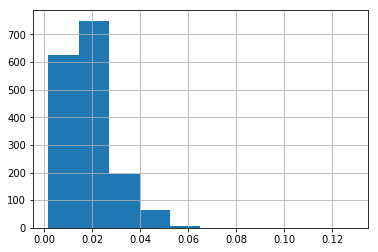

In [108]:
vs7_med['DENSITY'].hist()

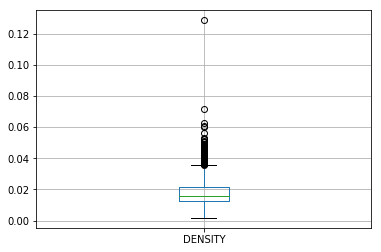

In [109]:
vs7_med.boxplot('DENSITY')

In [110]:
density = pd.DataFrame()
density[['CREATIONTIME', 'DENSITY']] = vs7_med[['CREATIONTIME', 'DENSITY']]
density.head()

,CREATIONTIME,DENSITY
0,2020-08-18 00:00:00,0.015054
1,2020-08-18 03:00:00,0.015535
2,2020-08-18 06:00:00,NaN
3,2020-08-18 09:00:00,0.013360
4,2020-08-18 12:00:00,0.015071


In [111]:
density.columns = ['ds', 'y']
model1 = Prophet()
model1.fit(density)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [112]:
Final1 = pd.DataFrame()

In [113]:
future2 = list()
for i in range(1, 13):
    date = '2020-%02d' % i
    future2.append([date])
future2 = pd.DataFrame(future2)
future2.columns = ['ds']
future2['ds'] = pd.to_datetime(future2['ds'])

In [114]:
forecast2 = model1.predict(future2)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2020-01-01  0.004441   -0.005510    0.013872
1 2020-02-01  0.005415   -0.005189    0.016104
2 2020-03-01  0.007387   -0.003181    0.017790
3 2020-04-01  0.007527   -0.002412    0.017035
4 2020-05-01  0.009369   -0.000837    0.019082


In [115]:
Final1 = Final1.append(forecast2)

In [116]:
future3 = list()
for i in range(1, 13):
    date = '2021-%02d' % i
    future3.append([date])
future3 = pd.DataFrame(future3)
future3.columns = ['ds']
future3['ds'] = pd.to_datetime(future3['ds'])

In [117]:
forecast3 = model1.predict(future3)
print(forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2021-01-01  0.016963    0.006416    0.026518
1 2021-02-01  0.020384    0.010111    0.030891
2 2021-03-01  0.025452    0.014951    0.035462
3 2021-04-01  0.032196    0.021439    0.042284
4 2021-05-01  0.027730    0.018136    0.038148


In [118]:
Final1 = Final1.append(forecast3)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:2224: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:252: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


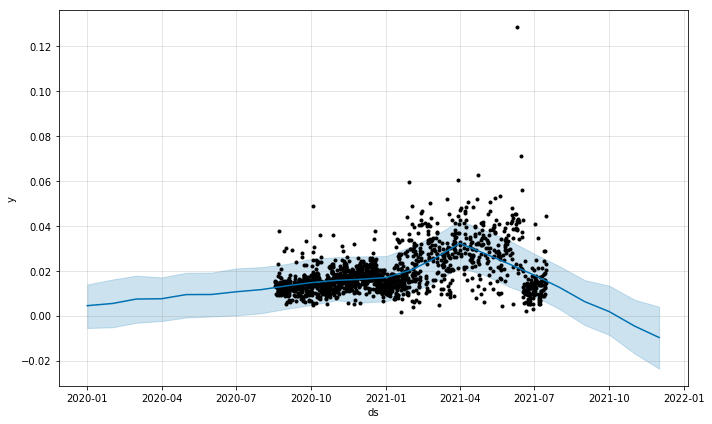

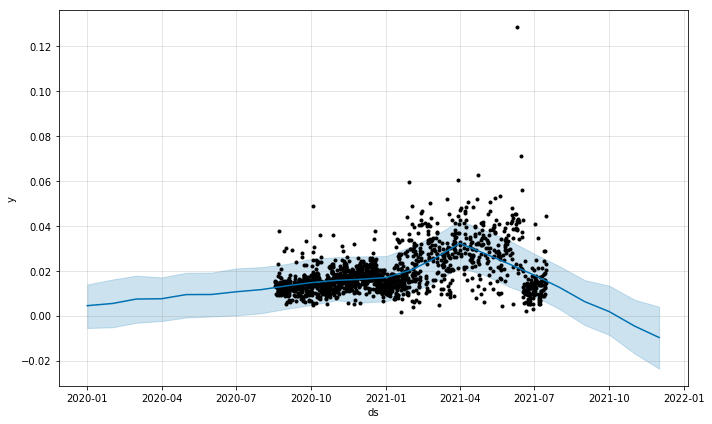

In [119]:
model1.plot(Final1)

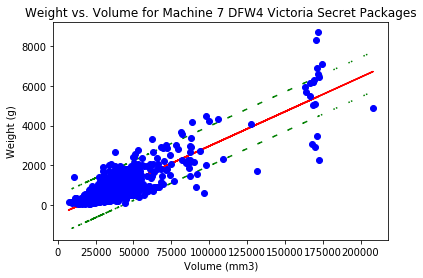

In [45]:
# ax = pyplot.gca()
# formatter = mdates.DateFormatter("%m/%d")
# ax.xaxis.set_major_formatter(formatter)
# locator = mdates.DayLocator()
# locator = mdates.WeekdayLocator(interval=2)
# ax.xaxis.set_major_locator(locator)

# y_values = vs7_med['VOLUME']
# x_values = np.linspace(0,1,len(vs7_med['VOLUME']))
# poly_degree = 1

# coeffs = np.polyfit(x_values, y_values, poly_degree)
# poly_eqn = np.poly1d(coeffs)
# y_hat = poly_eqn(x_values)

vs7_med = vs7_med[~vs7_med['VOLUME'].isna()]
vs7_med = vs7_med[~vs7_med['WEIGHT'].isna()]

x = np.array(vs7_med['VOLUME'])
y = np.array(vs7_med['WEIGHT'])
m, b = np.polyfit(x, y, 1)

# pyplot.plot(vs7_med['VOLUME'], y_hat, color = 'red')
pyplot.plot(x, m*x + b, color = 'red')
pyplot.plot(x, m*x + b + 1000, color = 'green', linestyle = (0,(1, 10)))
pyplot.plot(x, m*x + b - 1000, color = 'green', linestyle =  (0,(1, 10)))
pyplot.plot(vs7_med['VOLUME'], vs7_med['WEIGHT'], 'bo')

pyplot.xlabel("Volume (mm3)")
pyplot.ylabel("Weight (g)")
pyplot.title("Weight vs. Volume for Machine 7 DFW4 Victoria Secret Packages")

In [33]:
vs7_med['WEIGHT_hat'] = m * vs7_med['VOLUME'] + b

In [60]:
vs7_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 0 to 2653
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CREATIONTIME  1639 non-null   datetime64[ns]
 1   WEIGHT        1639 non-null   float64       
 2   VOLUME        1639 non-null   float64       
 3   DENSITY       1639 non-null   float64       
 4   WEIGHT_hat    1639 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 76.8 KB


In [65]:
print(vs7_med[vs7_med['WEIGHT'] > vs7_med['WEIGHT_hat'] + 1000])
vs7_med_noout = vs7_med[~(vs7_med['WEIGHT'] > vs7_med['WEIGHT_hat'] + 1000)]

            CREATIONTIME  WEIGHT    VOLUME   DENSITY   WEIGHT_hat
1290 2021-01-26 06:00:00  3586.0   81795.0  0.043841  2331.885846
1312 2021-01-29 00:00:00  2081.0   34850.0  0.059713   699.860319
1338 2021-02-01 06:00:00  8309.0  170888.0  0.048622  5429.170971
1404 2021-02-09 12:00:00  6899.0  171185.0  0.040301  5439.496066
1431 2021-02-12 21:00:00  4463.0   97913.0  0.045581  2892.222142
1438 2021-02-13 18:00:00  4354.0  106144.0  0.041020  3178.369806
1520 2021-02-24 00:00:00  2566.0   51102.0  0.050213  1264.855076
1681 2021-03-16 03:00:00  1980.0   38076.0  0.052001   812.011013
1702 2021-03-18 18:00:00  3695.0   81289.0  0.045455  2314.294943
1792 2021-03-30 00:00:00  2030.0   33561.0  0.060487   655.048712
1812 2021-04-01 12:00:00  4164.0   88477.0  0.047063  2564.183099
1873 2021-04-09 03:00:00  2428.5   50125.0  0.048449  1230.890033
1884 2021-04-10 12:00:00  1706.0   33768.0  0.050521   662.244990
1940 2021-04-17 12:00:00  2417.0   50020.0  0.048321  1227.239747
1988 2021-

In [66]:
print(vs7_med[vs7_med['WEIGHT'] < vs7_med['WEIGHT_hat'] - 1000])
vs7_med_noout = vs7_med_noout[~(vs7_med_noout['WEIGHT'] < vs7_med_noout['WEIGHT_hat'] - 1000)]

            CREATIONTIME  WEIGHT    VOLUME   DENSITY   WEIGHT_hat
417  2020-10-09 03:00:00  1724.5  131942.0  0.013070  4075.227715
661  2020-11-08 15:00:00  1578.0   92169.0  0.017121  2692.534111
669  2020-11-09 15:00:00  3494.0  171127.0  0.020418  5437.479718
836  2020-11-30 12:00:00  2898.5  169636.0  0.017087  5385.645655
1220 2021-01-17 12:00:00  4879.0  208187.0  0.023436  6725.856883
1478 2021-02-18 18:00:00   920.0   91632.0  0.010040  2673.865505
1549 2021-02-27 15:00:00  2253.0  172590.0  0.013054  5488.340371
1928 2021-04-16 00:00:00  1474.0   87535.0  0.016839  2531.434818
2096 2021-05-07 00:00:00  3069.0  167817.0  0.018288  5322.408795
2595 2021-07-08 09:00:00   613.0   96696.0  0.006339  2849.913588


In [67]:
vs7_med_noout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 2653
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CREATIONTIME  1601 non-null   datetime64[ns]
 1   WEIGHT        1601 non-null   float64       
 2   VOLUME        1601 non-null   float64       
 3   DENSITY       1601 non-null   float64       
 4   WEIGHT_hat    1601 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 75.0 KB


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:2224: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:252: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


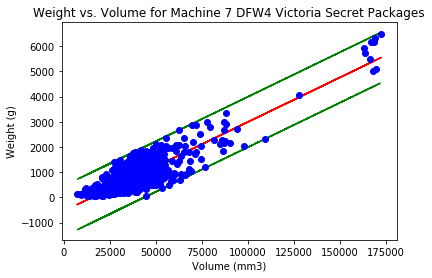

In [68]:
vs7_med_noout = vs7_med_noout[~vs7_med_noout['VOLUME'].isna()]
vs7_med_noout = vs7_med_noout[~vs7_med_noout['WEIGHT'].isna()]

x = np.array(vs7_med_noout['VOLUME'])
y = np.array(vs7_med_noout['WEIGHT'])
m, b = np.polyfit(x, y, 1)

# pyplot.plot(vs7_med['VOLUME'], y_hat, color = 'red')
pyplot.plot(x, m*x + b, color = 'red')
pyplot.plot(x, m*x + b + 1000, color = 'green', linestyle = 'dashed')
pyplot.plot(x, m*x + b - 1000, color = 'green', linestyle = 'dashed')
pyplot.plot(vs7_med_noout['VOLUME'], vs7_med_noout['WEIGHT'], 'bo')

pyplot.xlabel("Volume (mm3)")
pyplot.ylabel("Weight (g)")
pyplot.title("Weight vs. Volume for Machine 7 DFW4 Victoria Secret Packages")

In [69]:
print(polyfit(vs7_med_noout['VOLUME'], vs7_med_noout['WEIGHT'], 1))

{'polynomial': [0.03526599158244537, -541.4921714496866], 'correlation': 0.8856009422373116, 'determination': 0.784289028891614}


In [14]:
import numpy

# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = numpy.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results

print(polyfit(vs7_med['VOLUME'], vs7_med['WEIGHT'], 1))

{'polynomial': [0.03476462938634012, -511.68701511855363], 'correlation': 0.8708654603577005, 'determination': 0.7584066500440296}


In [18]:
vs7_med1 = vs7_med.sort_values('WEIGHT', ascending = False)

In [19]:
vs7_med1.head()

,CREATIONTIME,WEIGHT,VOLUME,DENSITY
2100,2021-05-07 12:00:00,8712.0,171600.0,0.050769
1338,2021-02-01 06:00:00,8309.0,170888.0,0.048622
2547,2021-07-02 09:00:00,7094.0,174682.0,0.040611
1404,2021-02-09 12:00:00,6899.0,171185.0,0.040301
2329,2021-06-05 03:00:00,6597.0,171976.0,0.038360


In [20]:
vs7_med1 = vs7_med1.drop(vs7_med1['WEIGHT'].idxmax())
vs7_med1 = vs7_med1.drop(vs7_med1['WEIGHT'].idxmax())

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:2224: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:252: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


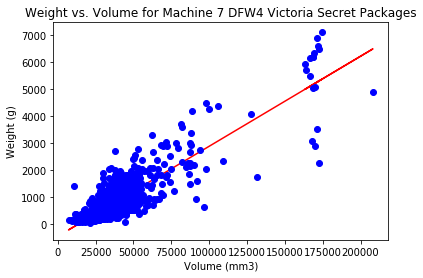

In [21]:
vs7_med1 = vs7_med1[~vs7_med1['VOLUME'].isna()]
vs7_med1 = vs7_med1[~vs7_med1['WEIGHT'].isna()]

x = np.array(vs7_med1['VOLUME'])
y = np.array(vs7_med1['WEIGHT'])
m, b = np.polyfit(x, y, 1)

# pyplot.plot(vs7_med['VOLUME'], y_hat, color = 'red')
pyplot.plot(x, m*x + b, color = 'red')
pyplot.plot(vs7_med1['VOLUME'], vs7_med1['WEIGHT'], 'bo')

pyplot.xlabel("Volume (mm3)")
pyplot.ylabel("Weight (g)")
pyplot.title("Weight vs. Volume for Machine 7 DFW4 Victoria Secret Packages")

In [22]:
print(polyfit(vs7_med1['VOLUME'], vs7_med1['WEIGHT'], 1))

{'polynomial': [0.033350033006307386, -465.04342988232946], 'correlation': 0.8648241167589346, 'determination': 0.7479207529278713}


In [23]:
vs7_med1.sort_values('VOLUME', ascending = False).head(10)

,CREATIONTIME,WEIGHT,VOLUME,DENSITY
1220,2021-01-17 12:00:00,4879.0,208187.0,0.023436
2547,2021-07-02 09:00:00,7094.0,174682.0,0.040611
37,2020-08-22 15:00:00,6470.0,172692.0,0.037466
1549,2021-02-27 15:00:00,2253.0,172590.0,0.013054
2329,2021-06-05 03:00:00,6597.0,171976.0,0.038360
1404,2021-02-09 12:00:00,6899.0,171185.0,0.040301
669,2020-11-09 15:00:00,3494.0,171127.0,0.020418
1748,2021-03-24 12:00:00,5078.0,170006.0,0.029870
836,2020-11-30 12:00:00,2898.5,169636.0,0.017087
1581,2021-03-03 15:00:00,6325.0,169497.0,0.037316


In [26]:
vs7_med2 = vs7_med1.drop(labels=[1549], axis=0)
vs7_med2.sort_values('VOLUME', ascending = False).head()

,CREATIONTIME,WEIGHT,VOLUME,DENSITY
1220,2021-01-17 12:00:00,4879.0,208187.0,0.023436
2547,2021-07-02 09:00:00,7094.0,174682.0,0.040611
37,2020-08-22 15:00:00,6470.0,172692.0,0.037466
2329,2021-06-05 03:00:00,6597.0,171976.0,0.038360
1404,2021-02-09 12:00:00,6899.0,171185.0,0.040301


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:2224: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:252: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


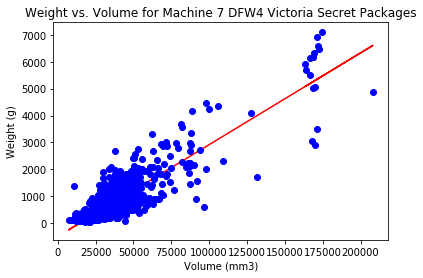

In [27]:
vs7_med2 = vs7_med2[~vs7_med2['VOLUME'].isna()]
vs7_med2 = vs7_med2[~vs7_med2['WEIGHT'].isna()]

x = np.array(vs7_med2['VOLUME'])
y = np.array(vs7_med2['WEIGHT'])
m, b = np.polyfit(x, y, 1)

# pyplot.plot(vs7_med['VOLUME'], y_hat, color = 'red')
pyplot.plot(x, m*x + b, color = 'red')
pyplot.plot(vs7_med2['VOLUME'], vs7_med2['WEIGHT'], 'bo')

pyplot.xlabel("Volume (mm3)")
pyplot.ylabel("Weight (g)")
pyplot.title("Weight vs. Volume for Machine 7 DFW4 Victoria Secret Packages")

In [28]:
print(polyfit(vs7_med2['VOLUME'], vs7_med2['WEIGHT'], 1))

{'polynomial': [0.03408073172129475, -489.15553247847356], 'correlation': 0.8707305539526673, 'determination': 0.7581716975867189}


# Machine 8, 3 Hours

In [46]:
vs8_med = vs8.resample('3H', on='CREATIONTIME').agg({'WEIGHT':'median', 'VOLUME':'median'})
vs8_med = vs8_med.reset_index()

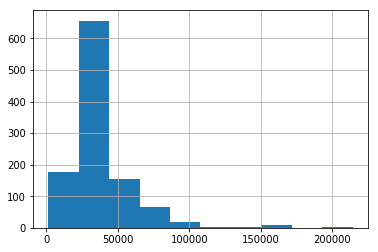

In [65]:
vs8_med['VOLUME'].hist()

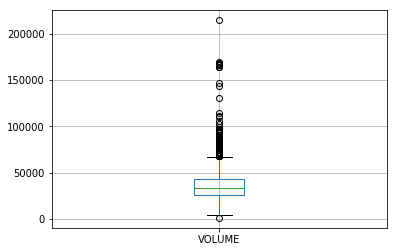

In [66]:
vs8_med.boxplot('VOLUME')

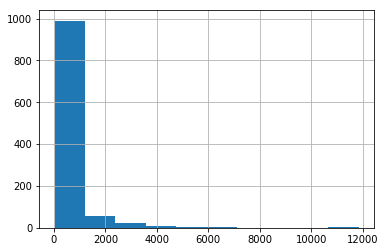

In [67]:
vs8_med['WEIGHT'].hist()

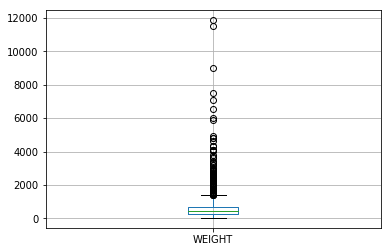

In [68]:
vs8_med.boxplot('WEIGHT')

### Volume - Machine 8, 3 Hours

In [69]:
volume1 = pd.DataFrame()
volume1[['CREATIONTIME', 'VOLUME']] = vs8_med[['CREATIONTIME', 'VOLUME']]
volume1.head()

,CREATIONTIME,VOLUME
0,2020-08-18 00:00:00,34901.5
1,2020-08-18 03:00:00,11024.0
2,2020-08-18 06:00:00,NaN
3,2020-08-18 09:00:00,NaN
4,2020-08-18 12:00:00,27744.0


In [70]:
volume1.columns = ['ds', 'y']
model2 = Prophet()
model2.fit(volume1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [71]:
Final2 = pd.DataFrame()

In [72]:
future4 = list()
for i in range(1, 13):
    date = '2020-%02d' % i
    future4.append([date])
future4 = pd.DataFrame(future4)
future4.columns = ['ds']
future4['ds'] = pd.to_datetime(future4['ds'])

In [73]:
forecast4 = model2.predict(future4)
print(forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2020-01-01  -1108.597066 -27796.004612  25951.746259
1 2020-02-01   5105.083012 -22377.303709  30664.921208
2 2020-03-01   3792.638781 -21251.271085  32372.500891
3 2020-04-01   8795.807406 -17720.798496  35768.930078
4 2020-05-01  14532.400763 -11974.007417  41677.765452


In [74]:
Final2 = Final2.append(forecast4)

In [75]:
future5 = list()
for i in range(1, 13):
    date = '2021-%02d' % i
    future5.append([date])
future5 = pd.DataFrame(future5)
future5.columns = ['ds']
future5['ds'] = pd.to_datetime(future5['ds'])

In [76]:
forecast5 = model2.predict(future5)
print(forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2021-01-01  42761.338451  13496.680746  69014.484562
1 2021-02-01  42869.676083  16958.891123  69865.148931
2 2021-03-01  43637.166470  18058.844182  70341.455346
3 2021-04-01  47533.130692  22760.941547  74087.882400
4 2021-05-01  46949.080841  19135.217218  72767.267184


In [77]:
Final2 = Final2.append(forecast5)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:2224: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:252: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


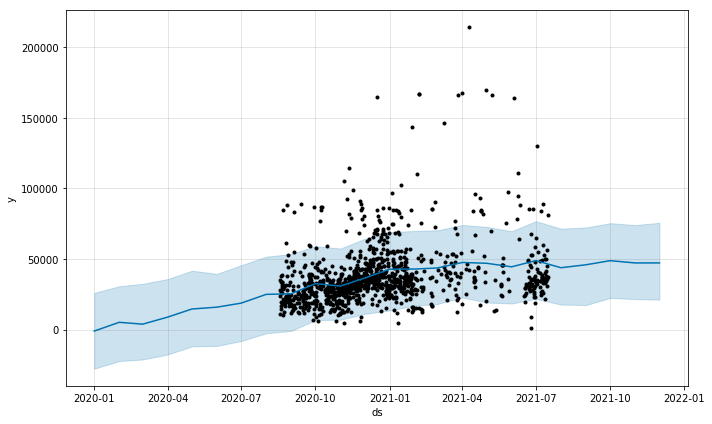

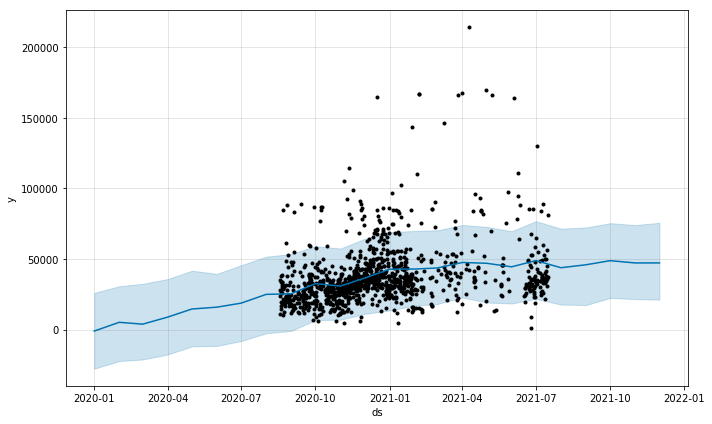

In [78]:
model2.plot(Final2)

### Weight - Machine 8, 3 Hours

In [89]:
weight1 = pd.DataFrame()
weight1[['CREATIONTIME', 'WEIGHT']] = vs8_med[['CREATIONTIME', 'WEIGHT']]
weight1.head()

,CREATIONTIME,WEIGHT
0,2020-08-18 00:00:00,408.0
1,2020-08-18 03:00:00,127.0
2,2020-08-18 06:00:00,NaN
3,2020-08-18 09:00:00,NaN
4,2020-08-18 12:00:00,327.0


In [90]:
weight1.columns = ['ds', 'y']
model3 = Prophet()
model3.fit(weight1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [91]:
Final3 = pd.DataFrame()

In [92]:
future6 = list()
for i in range(1, 13):
    date = '2020-%02d' % i
    future6.append([date])
future6 = pd.DataFrame(future6)
future6.columns = ['ds']
future6['ds'] = pd.to_datetime(future6['ds'])

In [93]:
forecast6 = model3.predict(future6)
print(forecast6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat   yhat_lower   yhat_upper
0 2020-01-01  -95.029662 -1290.320707  1049.767631
1 2020-02-01   70.912333 -1035.390623  1164.783007
2 2020-03-01  -98.903030 -1313.468621  1079.268930
3 2020-04-01   52.546492 -1105.941369  1172.784916
4 2020-05-01  225.475661  -930.934009  1283.900995


In [94]:
Final3 = Final3.append(forecast6)

In [95]:
future7 = list()
for i in range(1, 13):
    date = '2021-%02d' % i
    future7.append([date])
future7 = pd.DataFrame(future7)
future7.columns = ['ds']
future7['ds'] = pd.to_datetime(future7['ds'])

In [96]:
forecast7 = model3.predict(future7)
print(forecast7[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat  yhat_lower   yhat_upper
0 2021-01-01   781.941714 -438.447122  1937.293991
1 2021-02-01   760.605014 -452.540443  1864.482488
2 2021-03-01   812.557320 -341.142842  1959.699519
3 2021-04-01   990.270315  -47.954381  2145.423091
4 2021-05-01  1015.418089 -233.461843  2206.838431


In [97]:
Final3 = Final3.append(forecast7)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:2224: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:252: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


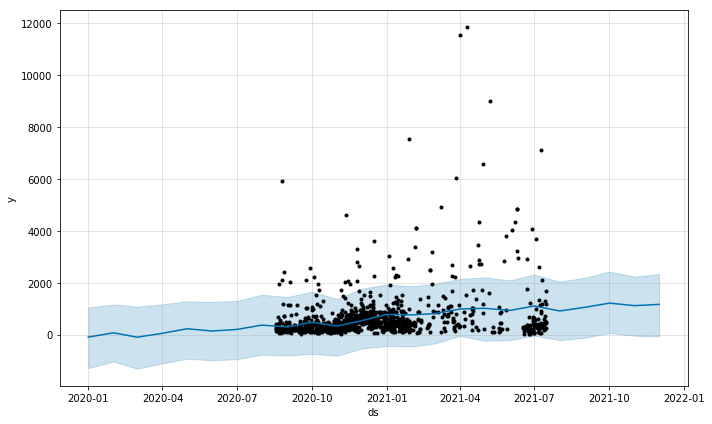

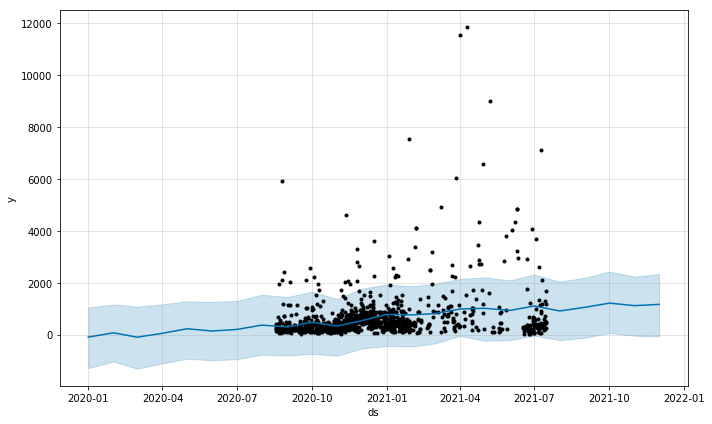

In [98]:
model3.plot(Final3)

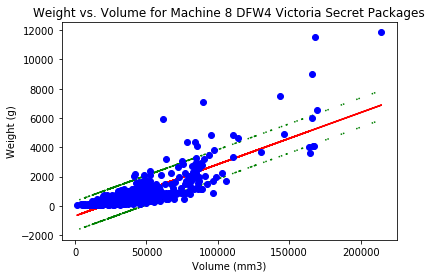

In [47]:
vs8_med = vs8_med[~vs8_med['VOLUME'].isna()]
vs8_med = vs8_med[~vs8_med['WEIGHT'].isna()]

x = np.array(vs8_med['VOLUME'])
y = np.array(vs8_med['WEIGHT'])
m, b = np.polyfit(x, y, 1)

# pyplot.plot(vs7_med['VOLUME'], y_hat, color = 'red')
pyplot.plot(x, m*x + b, color = 'red')
pyplot.plot(x, m*x + b + 1000, color = 'green', linestyle = (0,(1, 10)))
pyplot.plot(x, m*x + b - 1000, color = 'green', linestyle =  (0,(1, 10)))
pyplot.plot(vs8_med['VOLUME'], vs8_med['WEIGHT'], 'bo')

pyplot.xlabel("Volume (mm3)")
pyplot.ylabel("Weight (g)")
pyplot.title("Weight vs. Volume for Machine 8 DFW4 Victoria Secret Packages")

In [51]:
print(polyfit(vs8_med['VOLUME'], vs8_med['WEIGHT'], 1))

{'polynomial': [0.03531088625061918, -690.7845883066835], 'correlation': 0.8263981191667653, 'determination': 0.6829338513623673}


In [48]:
vs8_med1 = vs8_med.drop(vs8_med['WEIGHT'].idxmax())
vs8_med1 = vs8_med1.drop(vs8_med1['WEIGHT'].idxmax())
vs8_med1 = vs8_med1.drop(vs8_med1['WEIGHT'].idxmax())
vs8_med1 = vs8_med1.drop(vs8_med1['WEIGHT'].idxmax())
vs8_med1 = vs8_med1.drop(vs8_med1['WEIGHT'].idxmax())

In [53]:
vs8_med1 = vs8_med1.drop(vs8_med1['WEIGHT'].idxmax())
vs8_med1 = vs8_med1.drop(vs8_med1['WEIGHT'].idxmax())

In [56]:
vs8_med1 = vs8_med1.drop(vs8_med1['WEIGHT'].idxmax())

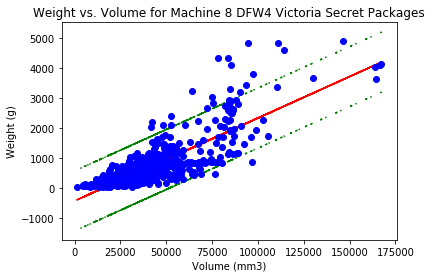

In [57]:
vs8_med1 = vs8_med1[~vs8_med1['VOLUME'].isna()]
vs8_med1 = vs8_med1[~vs8_med1['WEIGHT'].isna()]

x = np.array(vs8_med1['VOLUME'])
y = np.array(vs8_med1['WEIGHT'])
m, b = np.polyfit(x, y, 1)

# pyplot.plot(vs7_med['VOLUME'], y_hat, color = 'red')
pyplot.plot(x, m*x + b, color = 'red')
pyplot.plot(x, m*x + b + 1000, color = 'green', linestyle = (0,(1, 10)))
pyplot.plot(x, m*x + b - 1000, color = 'green', linestyle =  (0,(1, 10)))
pyplot.plot(vs8_med1['VOLUME'], vs8_med1['WEIGHT'], 'bo')

pyplot.xlabel("Volume (mm3)")
pyplot.ylabel("Weight (g)")
pyplot.title("Weight vs. Volume for Machine 8 DFW4 Victoria Secret Packages")

In [58]:
print(polyfit(vs8_med1['VOLUME'], vs8_med1['WEIGHT'], 1))

{'polynomial': [0.02762411519801351, -431.43619357282194], 'correlation': 0.8265096684803752, 'determination': 0.6831182320915398}
